# Множественные субграфики

Иногда удобно сравнить различные представления данных, разместив их бок о бок. В библиотеке Matplotlib на такой случай предусмотрено понятие субграфиков (subplots): несколько маленьких систем координат могут сосуществовать на одном рисунке. Эти субграфики могут представлять собой вставки, сетки графиков или еще более сложные схемы размещения. В данном разделе мы рассмотрим четыре функции для создания субграфиков в библиотеке Matplotlib. Начнем с настройки блокнота для построения графиков и импорта функций, которые нам понадобятся:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## plt.axes: создание субграфиков вручную

Использование функции plt.axes — простейший метод создания систем координат, по умолчанию стандартного объекта для системы координат, заполняющего весь график. plt.axes также принимает на входе необязательный аргумент, представляющий собой список из четырех чисел в системе координат рисунка. Эти числа означают [левый угол, низ, ширина, высота] в системе координат рисунка, отсчет которых начинается с 0 в нижнем левом и заканчивается 1 в верхнем правом углу рисунка.
Например, мы можем создать «вставную» систему координат в верхнем правом углу другой системы координат, задав координаты x и y ее местоположения равными 0.65 (то есть начинающимися на 65 % ширины и 65 % высоты рисунка), а ее размеры по осям X и Y равными 0.2 (то есть размер этой системы координат составляет 20 % ширины и 20 % высоты рисунка).

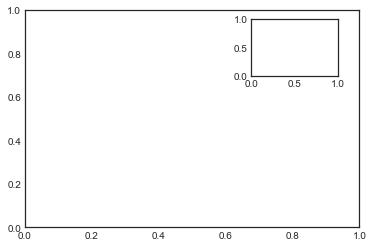

In [3]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Аналог этой команды в объектно-ориентированном интерфейсе — функция fig.add_axes(). Воспользуемся ею для создания двух расположенных друг над другом систем координат:

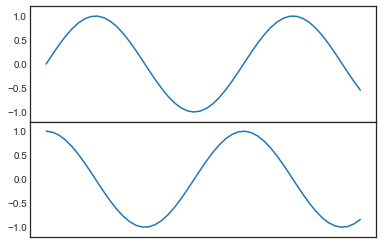

In [15]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

Мы получили две соприкасающиеся системы координат (верхняя — без делений): низ верхней области (находящийся на 50 % от размера рисунка) соответствует верху нижней области (находится на 10 + 40 % от размера рисунка).

## plt.subplot: простые сетки субграфиков

Выровненные столбцы или строки субграфиков бывают нужны достаточно часто для того, чтобы в библиотеку Matplotlib было включено несколько удобных утилит, облегчающих их создание. Самая низкоуровневая из них — функция plt.subplot, создающая отдельный субграфик внутри сетки. Эта команда принимает на входе три целочисленных аргумента — количество строк, количество столбцов и индекс создаваемого по такой схеме графика, отсчет которого начинается в верхнем левом углу и заканчивается в правом нижнем:

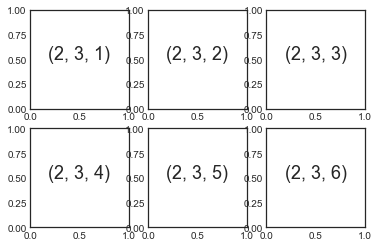

In [17]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center');

Для настройки размеров полей между этими графиками можно выполнить команду plt.subplots_adjust. Следующий код использует эквивалентную объектно-ориентированную команду fig.add_subplot():

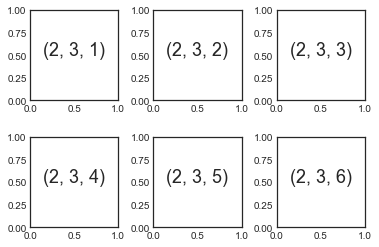

In [24]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

Мы воспользовались аргументами hspace и wspace функции plt.subplots_adjust(), позволяющими задать поля по высоте и ширине рисунка в единицах высоты субграфика (в данном случае поля составляют 40 % от ширины и высоты субграфика).

## Функция plt.subplots: создание всей сетки за один раз

Только что описанный подход может оказаться довольно трудоемким при создании большой сетки субграфиков, особенно если нужно скрыть метки осей X и Y на внутренних графиках. В этом случае удобнее использовать функцию plt.subplots() (обратите внимание на букву s в конце subplots). Вместо отдельного субграфика эта функция создает целую сетку субграфиков одной строкой кода и возвращает их в массиве NumPy. Ее аргументы: количество строк и столбцов, а также необязательные ключевые слова sharex и sharey, позволяющие задавать связи между различными системами координат.

Здесь мы создаем сетку 2 × 3 субграфиков, в которой у всех систем координат в одной строке одинаковая шкала по оси Y, а у всех систем координат в одном столбце — одинаковая шкала по оси X:

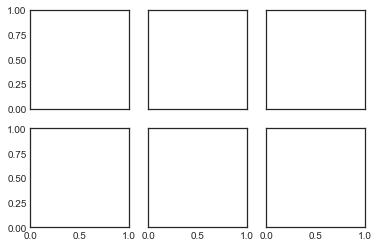

In [25]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Обратите внимание, что указание ключевых слов sharex и sharey приводит к автоматическому удалению внутренних меток с сетки в целях очистки пространства графика. Итоговая сетка систем координат возвращается в массиве NumPy, что дает возможность легко ссылаться на требуемую систему координат с помощью обычной индексации, используемой для массивов:

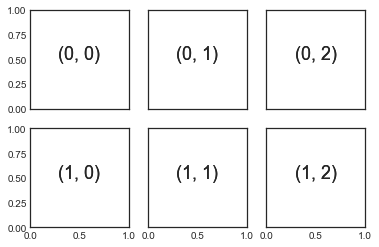

In [27]:
# Системы координат располагаются в двумерном массиве,
# индексируемом по [строка, столбец]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

По сравнению с plt.subplot() функция plt.subplots() намного лучше согласуется с принятой в языке Python индексацией, начинающейся с 0.

## Функция plt.GridSpec: более сложные конфигурации

При выходе за пределы обычной сетки графиков к субграфикам, занимающим много строк и столбцов, наилучшим инструментом считается plt.GridSpec. Сам по себе объект plt.GridSpec не создает графиков, это просто удобный интерфейс, понятный команде plt.subplot(). Например, вызов GridSpec для сетки из двух строк и трех столбцов с заданными значениями ширины и высоты будет выглядеть следующим образом:

In [28]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

Затем мы можем задать местоположение и размеры субграфиков с помощью обычного синтаксиса срезов языка Python:

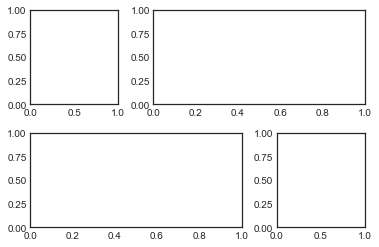

In [29]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

Подобное гибкое выравнивание сетки находит множество различных применений. Может использоваться при создании графиков гистограмм с несколькими системами координат:

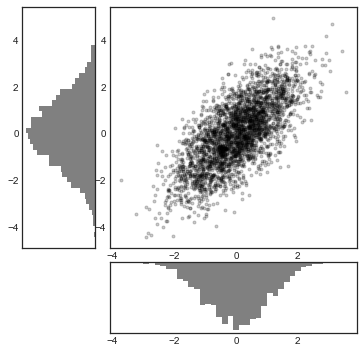

In [33]:
# создаем нормально распределенные данные
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# задаем системы координат с помощью функции GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# распределяем точки по одной системе координат
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# рисуем гистограммы на дополнительных системах координат
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Такое распределение, выводимое на отдельных графиках по бокам, настолько распространено, что в пакете Seaborn для построения его графиков предусмотрено отдельное API. Подробную информацию см. в разделе «Визуализация с помощью библиотеки Seaborn» данной главы.